# Requests

## Requests basics

[Requests](https://requests.readthedocs.io/en/master/user/quickstart/) is a Python module for communicating with web pages. 
We can connect to a web page by passing the address of the page to the the request's `get()` function: 

In [2]:
import requests

url = "https://en.wikipedia.org/wiki/Buffalo,_New_York"
page = requests.get(url)

The `get()` function returns an object with several types of data returned by the web server. For example, we can check the [status code](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) of the connection. The code 200 means that the everything went fine:

In [30]:
page.status_code

200

Code 404 means that the requested page has not been found:

In [33]:
bad_url = "https://en.wikipedia.org/THERE_IS_NO_SUCH_PAGE"
bad_page = requests.get(bad_url)
bad_page.status_code

404

The text of the web page can be retrieved using the `text` property:

In [98]:
from pprint import pprint

page_text = page.text
pprint(page_text[200000:201000], width=80)  # print a fragment of the wikipadia page text

('ke.jpg 2x" data-file-width="1536" data-file-height="1020" /></a>  <div '
 'class="thumbcaption"><div class="magnify"><a '
 'href="/wiki/File:Delaware_Park_lake.jpg" class="internal" '
 'title="Enlarge"></a></div>Hoyt Lake at Delaware Park</div></div></div>\n'
 '<p>The Buffalo parks system has over 20 parks with several parks accessible '
 'from any part of the city. The Olmsted Park and Parkway System is the '
 "hallmark of Buffalo's many green spaces. Three-fourths of city parkland is "
 'part of the system, which comprises six major parks, eight connecting '
 'parkways, nine circles and seven smaller spaces. Constructed in 1868 by <a '
 'href="/wiki/Frederick_Law_Olmsted" title="Frederick Law Olmsted">Frederick '
 'Law Olmsted</a> and his partner <a href="/wiki/Calvert_Vaux" title="Calvert '
 'Vaux">Calvert Vaux</a>, the system was integrated into the city and marks '
 'the first attempt in America to lay out a coordinated system of public parks '
 'and parkways. The Olmsted-design

## Binary files

Some web addresses point not to web pages, but to other types of data: images, videos, pdf files etc. We can retrieve such data using requests too. For example, here is the url of a [jpeg file](https://upload.wikimedia.org/wikipedia/commons/9/93/Northern_Cardinal_Male-27527-3.jpg) posted on Wikimedia Commons:

In [60]:
photo_url = "https://upload.wikimedia.org/wikipedia/commons/9/93/Northern_Cardinal_Male-27527-3.jpg"

Here we download the photo and save it to a file:

In [71]:
p = requests.get(photo_url) 
photo = p.content # get the binary content of the file

# save the photo to a file
with open("northern_cardinal.jpg", 'wb') as f:
    f.write(photo)

We can now display the downloaded file:

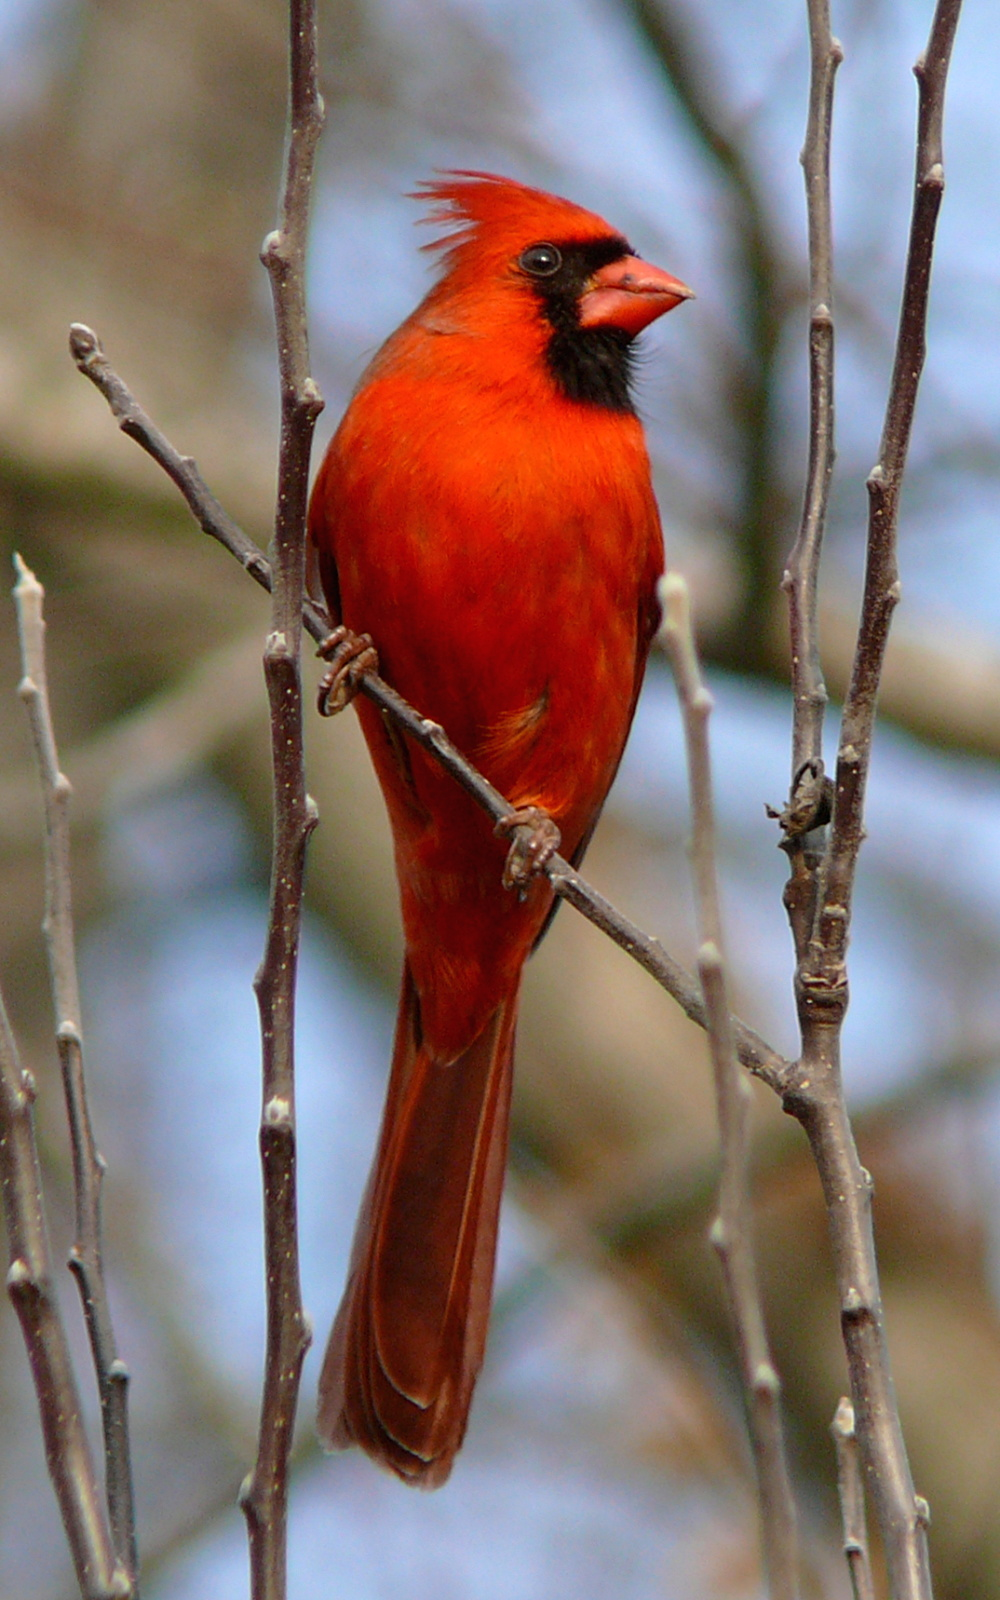

In [73]:
from IPython.core.display import Image
Image("northern_cardinal.jpg", width=250)

## User Agent

Every request sent by a web browser to a web server includes user agent, a string with information about the type of browser, the computer on which the browser operates etc. For example, the following user agent identifies the browser as Firefox 73 operating on a Macintosh with the operating system Mac OS X 10.14:

```
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:73.0) Gecko/20100101 Firefox/73.0
```

The website [httpbin.org/get](https://httpbin.org/get) simply displays the data sent to it by the browser, so you can visit it to check the user agent used by your web browser. Using requests to connect to this website, we can inspect the default user agent set by the requests module:

In [129]:
page = requests.get("https://httpbin.org/get")
print(page.text)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e615933-8b363310b894fbadfde15504"
  }, 
  "origin": "98.118.166.16", 
  "url": "https://httpbin.org/get"
}



The default user agent can occasionally create difficulties, since some websites may reject queries which come from a Python script (and not a web browser). However, it is possible to change the request's user agent to any value as follows: 

In [8]:
# lets pretend to be Firefox on a Mac
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:73.0) Gecko/20100101 Firefox/73.0"

# create a dictionary specifying the user agent
headers = {'User-Agent': user_agent}
# pass the dictionary to the get() function
page = requests.get("https://httpbin.org/get", headers=headers)
# check the data we sent to the website
print(page.text)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:73.0) Gecko/20100101 Firefox/73.0", 
    "X-Amzn-Trace-Id": "Root=1-5e61617a-8abd45785437c000a849d2bc"
  }, 
  "origin": "98.118.166.16", 
  "url": "https://httpbin.org/get"
}



## Sending data

In some cases we need to specify more data, beside a web page address to get the information we need. For example, to search the University at Buffalo website, we need to specify the search query on the [UB search page](https://www.buffalo.edu/search/search.html). This can be accomplished using requests as follows:

In [27]:
url = "https://www.buffalo.edu/search/search.html"

# define dictionary with data to be sent to the web page
# here we are specifing that we want to search for the word "mathematics"
payload = {"query": "mathematics"}
page = requests.get(url, headers=headers, params=payload)

The code below displays a fragment of the retrieved web page with search results:

In [78]:
from IPython.core.display import HTML
start_text = page.text.find("<span>The University at Buffalo Department")
end_text =  page.text.find("Welcome!")
HTML(page.text[start_text:end_text])